In [1]:
import pandas as pd
import numpy as np

# Interpolation for 128 var

In [173]:
random_seed = [(19521281 + i) for i in range(10)]
x_128 = []
y_128 = []
for seed in random_seed:
  data = pd.read_csv('{}.csv'.format(seed))
  data.drop(data.columns[[0]], axis=1, inplace=True)
  data.columns = ['best_fitness', 'num_calls']
  x_128.append(list(data['num_calls']))
  y_128.append(list(data['best_fitness']))

In [185]:
def interpolation_128_var(num_calls, best_fitness, num_variable):
  x = [i for i in range(0, 50001 if num_variable == 2 else 20000, 100*num_variable)]
  y = []
  std_y = []

  temp_y = []
  for i in range(10):
    temp_y.append(np.interp(x, num_calls[i], best_fitness[i]))
  y.append(temp_y)

  final_y = []
  final_x = [x]
  for _ in range(1):
    y_ = []
    for i in range(len(y[_][0])):
      sum_ = 0
      for j in range(len(y[_])):
        sum_ += y[_][j][i]

      sum_ /= 10
      y_.append(sum_)  

    final_y.append(y_)
    std_y.append(np.std(np.array(y_), axis=0))

  return final_x, final_y, std_y
  

In [186]:
x1, y1, error_1 = interpolation_128_var(num_calls=x_128, best_fitness=y_128, num_variable=10)
x1 = np.array(x1).ravel()
y1 = np.array(y1).ravel()

# Interpolation for 1024 var

In [176]:
random_seed = [(19521281 + i) for i in range(10)]
x_1024 = []
y_1024 = []
for seed in random_seed:
  data = pd.read_csv('{}.csv'.format(seed))
  data.drop(data.columns[[0]], axis=1, inplace=True)
  data.columns = ['best_fitness', 'num_calls']
  x_1024.append(list(data['num_calls']))
  y_1024.append(list(data['best_fitness']))

In [187]:
def interpolation_1024_var(num_calls, best_fitness, num_variable):
  x = [i for i in range(0, 50001 if num_variable == 2 else 20001, 100*num_variable)]
  y = []
  std_y = []

  temp_y = []
  for i in range(10):
    temp_y.append(np.interp(x, num_calls[i], best_fitness[i]))
  y.append(temp_y)

  final_y = []
  final_x = [x]
  for _ in range(1):
    y_ = []
    for i in range(len(y[_][0])):
      sum_ = 0
      for j in range(len(y[_])):
        sum_ += y[_][j][i]

      sum_ /= 10
      y_.append(sum_)  

    final_y.append(y_)
    std_y.append(np.std(np.array(y_), axis=0))

  return final_x, final_y, std_y

In [188]:
x2, y2, error_2 = interpolation_1024_var(num_calls=x_1024, best_fitness=y_1024, num_variable=10)
x2 = np.array(x2).ravel()
y2 = np.array(y2).ravel()

In [8]:
import matplotlib.pyplot as plt

# Draw graph for ES

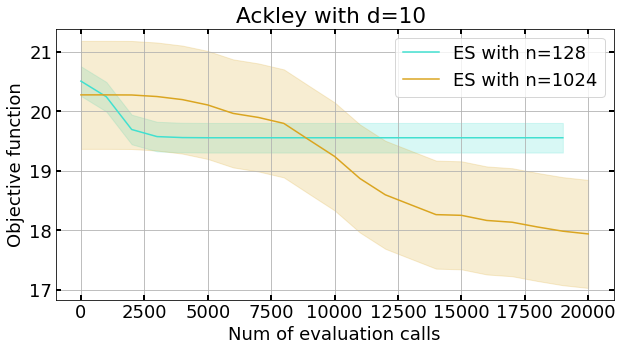

In [189]:
figure = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

axes = plt.subplot(111)
axes.plot(x1, y1, "b-", color = 'Turquoise', label = 'ES with n=128')
axes.fill_between(x1 , y1 + error_1, y1 - error_1, color = 'Turquoise', alpha = 0.2)
axes.plot(x2 , y2, "g-", color = 'Goldenrod', label = 'ES with n=1024')
axes.fill_between(x2, y2 + error_2, y2 - error_2, color = 'Goldenrod', alpha = 0.2)


axes.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
axes.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

axes.set_title("Ackley with d=10 ")
axes.set_xlabel("Num of evaluation calls")
axes.set_ylabel("Objective function")

axes.grid()
plt.legend(loc = 'best')
plt.show()


figure.savefig("Ackley_ES_10.jpg",format="jpg", dpi=300)

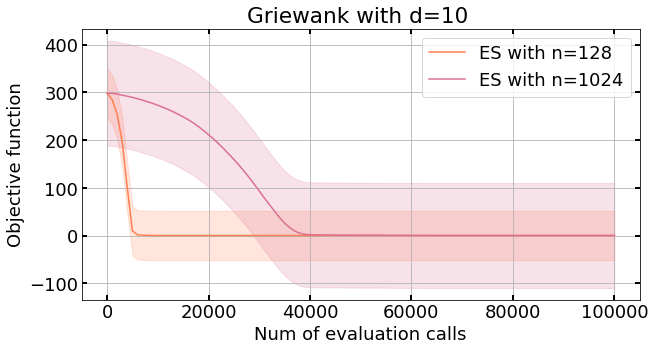

In [101]:
figure = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

axes = plt.subplot(111)
axes.plot(x1, y1, "b-", color = 'Coral', label = 'ES with n=128')
axes.fill_between(x1 , y1 + error_1, y1 - error_1, color = 'Coral', alpha = 0.2)
axes.plot(x2 , y2, "g-", color = 'PaleVioletRed', label = 'ES with n=1024')
axes.fill_between(x2, y2 + error_2, y2 - error_2, color = 'PaleVioletRed', alpha = 0.2)


axes.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
axes.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

axes.set_title("Griewank with d=10 ")
axes.set_xlabel("Num of evaluation calls")
axes.set_ylabel("Objective function")

axes.grid()
plt.legend(loc = 'best')
plt.show()


figure.savefig("Griewank_ES_10.jpg",format="jpg", dpi=300)

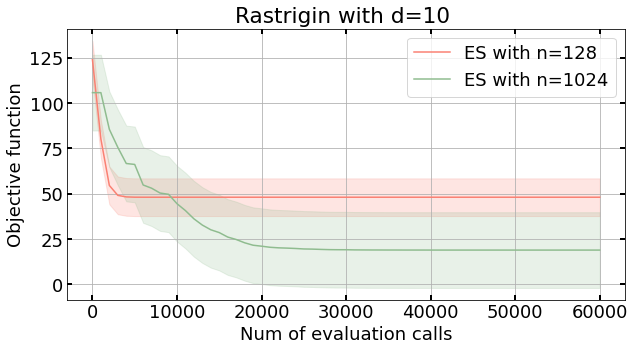

In [124]:
figure = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

axes = plt.subplot(111)
axes.plot(x1, y1, "b-", color = 'Salmon', label = 'ES with n=128')
axes.fill_between(x1 , y1 + error_1, y1 - error_1, color = 'Salmon', alpha = 0.2)
axes.plot(x2 , y2, "g-", color = 'DarkSeaGreen', label = 'ES with n=1024')
axes.fill_between(x2, y2 + error_2, y2 - error_2, color = 'DarkSeaGreen', alpha = 0.2)


axes.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
axes.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

axes.set_title("Rastrigin with d=10 ")
axes.set_xlabel("Num of evaluation calls")
axes.set_ylabel("Objective function")

axes.grid()
plt.legend(loc = 'best')
plt.show()


figure.savefig("Rastrigin_ES_10.jpg",format="jpg", dpi=300)

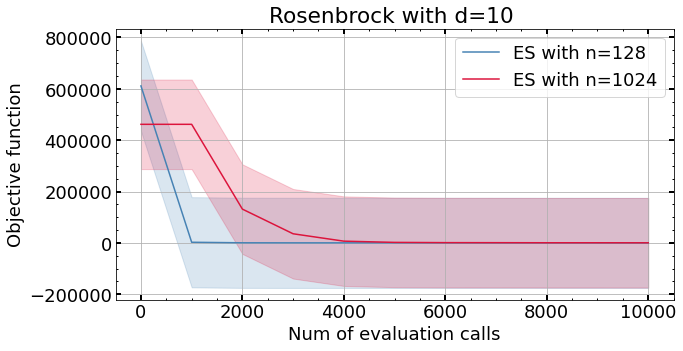

In [141]:
figure = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

axes = plt.subplot(111)
axes.plot(x1, y1, "b-", color = 'SteelBlue', label = 'ES with n=128')
axes.fill_between(x1 , y1 + error_1, y1 - error_1, color = 'SteelBlue', alpha = 0.2)
axes.plot(x2 , y2, "g-", color = 'Crimson', label = 'ES with n=1024')
axes.fill_between(x2, y2 + error_2, y2 - error_2, color = 'Crimson', alpha = 0.2)

axes.minorticks_on()
axes.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
axes.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

axes.set_title("Rosenbrock with d=10 ")
axes.set_xlabel("Num of evaluation calls")
axes.set_ylabel("Objective function")

axes.grid()
plt.legend(loc = 'best')
plt.show()


figure.savefig("Rosenbrock_ES_10.jpg",format="jpg", dpi=300)

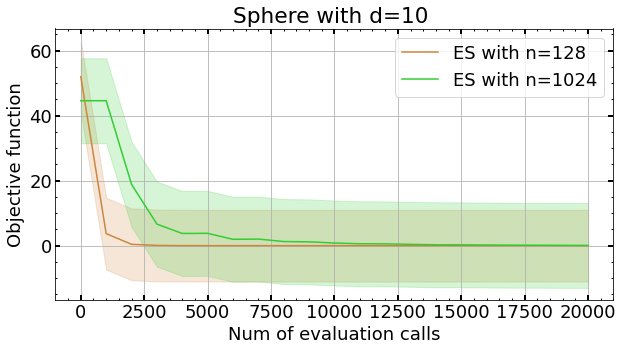

In [164]:
figure = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

axes = plt.subplot(111)
axes.plot(x1, y1, "b-", color = 'Peru', label = 'ES with n=128')
axes.fill_between(x1 , y1 + error_1, y1 - error_1, color = 'Peru', alpha = 0.2)
axes.plot(x2 , y2, "g-", color = 'LimeGreen', label = 'ES with n=1024')
axes.fill_between(x2, y2 + error_2, y2 - error_2, color = 'LimeGreen', alpha = 0.2)

axes.minorticks_on()
axes.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
axes.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

axes.set_title("Sphere with d=10 ")
axes.set_xlabel("Num of evaluation calls")
axes.set_ylabel("Objective function")

axes.grid()
plt.legend(loc = 'best')
plt.show()


figure.savefig("Sphere_ES_10.jpg",format="jpg", dpi=300)